## ETS

## Error/Trend/Seasonality Models
As we begin working with <em>endogenous</em> data ("endog" for short) and start to develop forecasting models, it helps to identify and isolate factors working within the system that influence behavior. Here the name "endogenous" considers internal factors, while "exogenous" would relate to external forces. These fall under the category of <em>state space models</em>, and include <em>decomposition</em> (described below), and <em>exponential smoothing</em> (described in an upcoming section).

The <a href='https://en.wikipedia.org/wiki/Decomposition_of_time_series'>decomposition</a> of a time series attempts to isolate individual components such as <em>error</em>, <em>trend</em>, and <em>seasonality</em> (ETS). We've already seen a simplistic example of this in the <strong>Introduction to Statsmodels</strong> section with the Hodrick-Prescott filter. There we separated data into a trendline and a cyclical feature that mapped observed data back to the trend.

<div class="alert alert-info"><h3>Related Function:</h3>
<tt><strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html'>statsmodels.tsa.seasonal.seasonal_decompose</a></strong><font color=black>(x, model)</font>&nbsp;&nbsp;
Seasonal decomposition using moving averages</tt>
<h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/ets.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Innovations state space models for exponential smoothing</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Decomposition_of_time_series'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Decomposition of time series</font></div>

## Seasonal Decomposition
Statsmodels provides a <em>seasonal decomposition</em> tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.


We apply an <strong>additive</strong> model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).<br>
A <strong>multiplicative</strong> model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

For these examples we'll use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds = pd.read_csv('../data/PJME_hourly.csv',index_col='Datetime',parse_dates=True)

In [3]:
ds.sort_index(inplace=True)

In [4]:
ds.shape

(145366, 1)

In [13]:
ds.head()

,PJME_MW
Datetime,
2002-01-01 01:00:00,30393.0
2002-01-01 02:00:00,29265.0
2002-01-01 03:00:00,28357.0
2002-01-01 04:00:00,27899.0
2002-01-01 05:00:00,28057.0


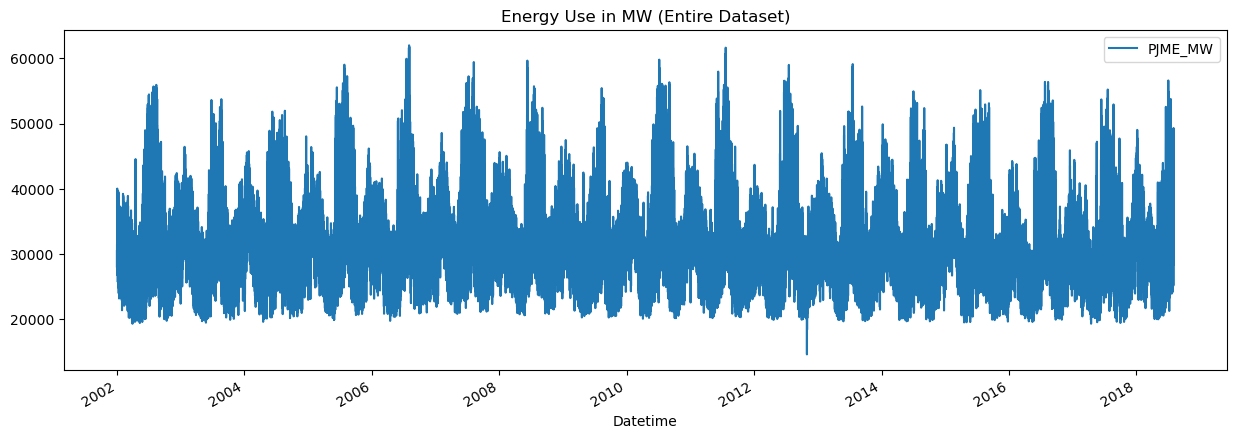

In [7]:
ds.plot(figsize=(15, 5), title='Energy Use in MW (Entire Dataset)');

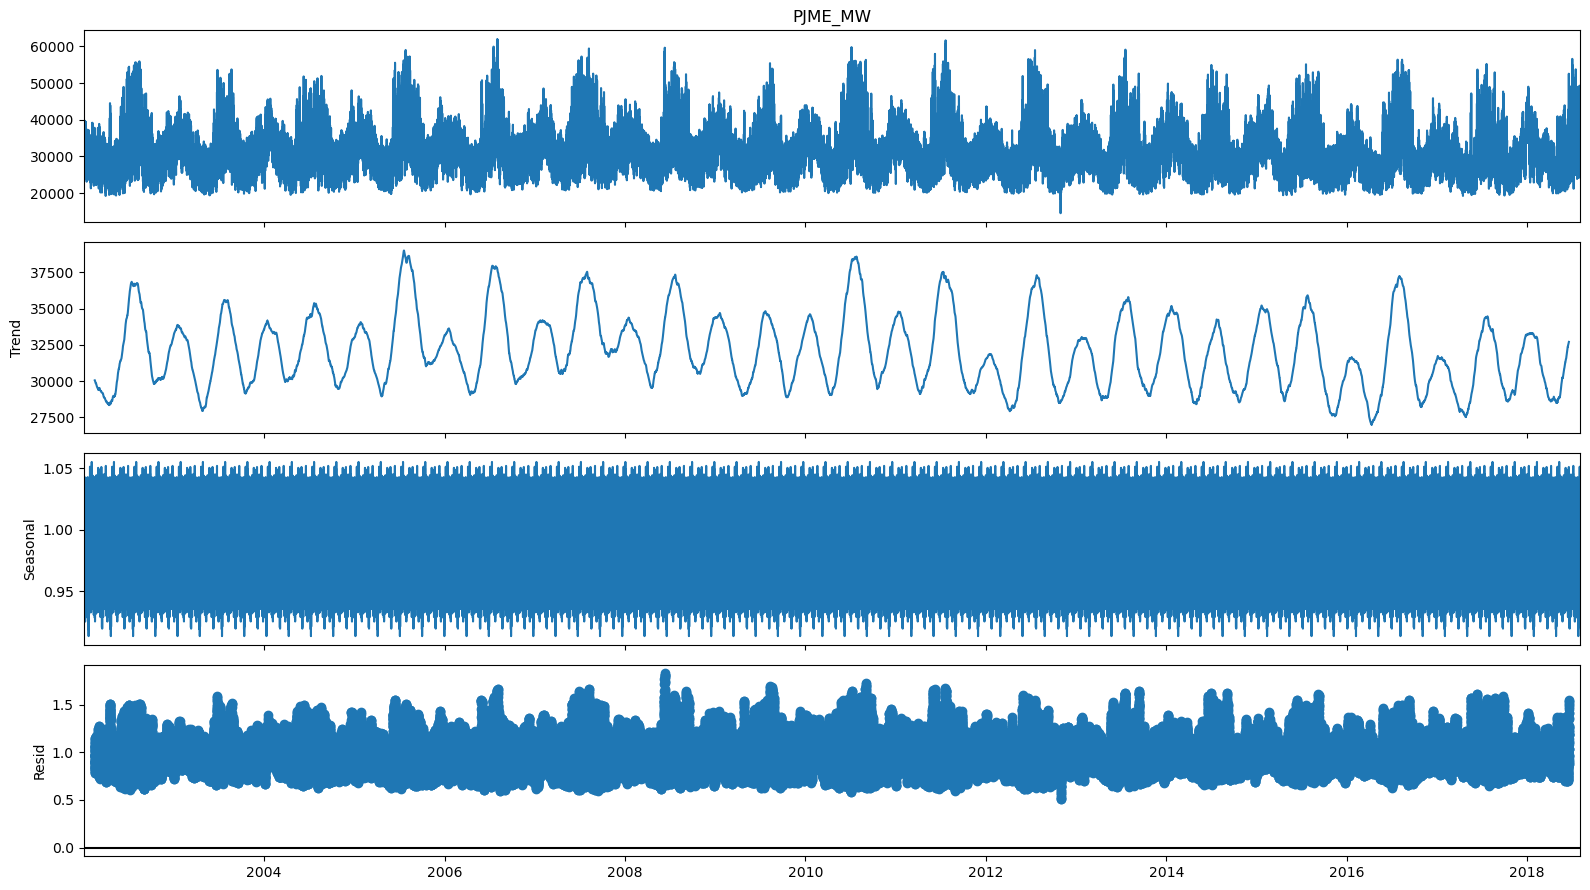

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ds['PJME_MW'], period=2160, model='mul')  # model='mul'/'add'
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()

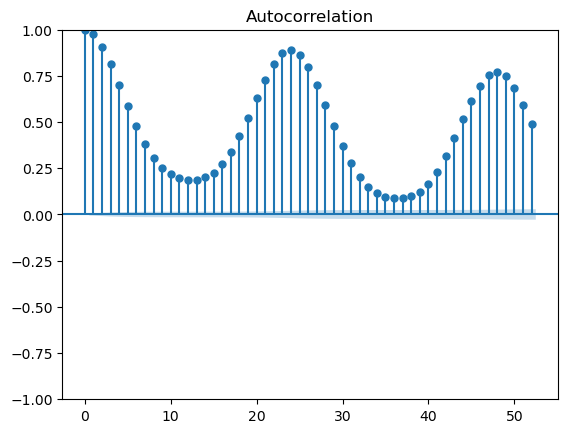

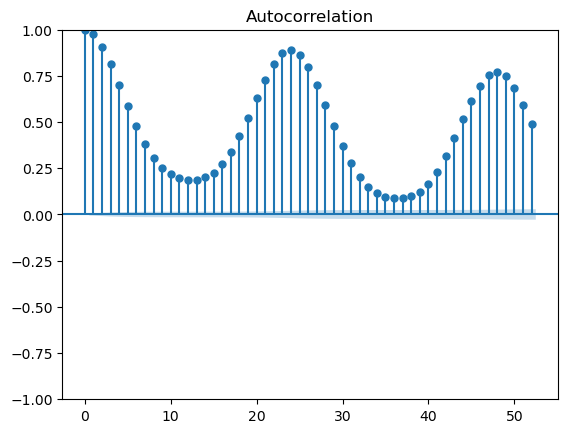

In [117]:
plot_acf(ds['PJME_MW'])

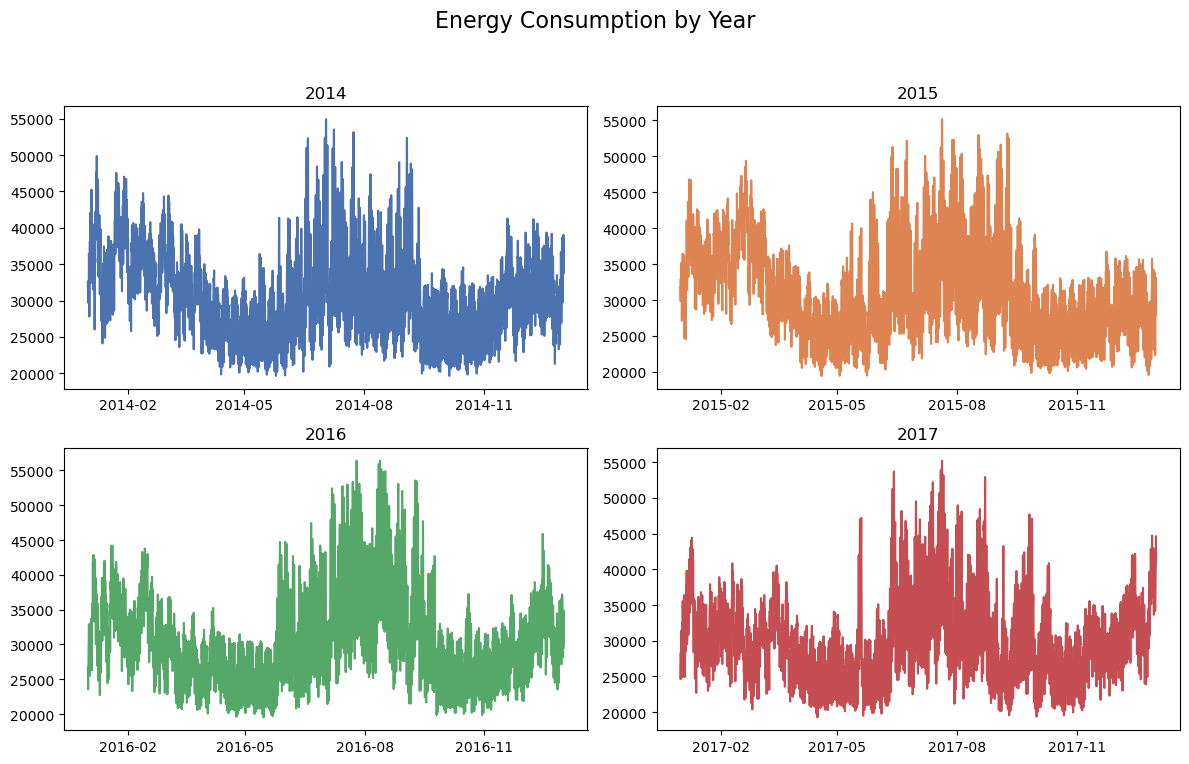

In [19]:
import seaborn as sns
import matplotlib.dates as mdates

years = [ds[ds.index.year == 2014], ds[ds.index.year == 2015], ds[ds.index.year == 2016], ds[ds.index.year == 2017]]
year_labels = ['2014', '2015', '2016', '2017']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Energy Consumption by Year', fontsize=16)

axes = axes.flatten()

colors = sns.color_palette('deep', 4)

for i, year in enumerate(years):
    axes[i].plot(year.index, year['PJME_MW'], color=colors[i])
    axes[i].set_title(year_labels[i])
    axes[i].xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Setting x axis tick marks/intervals
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
plt.show()

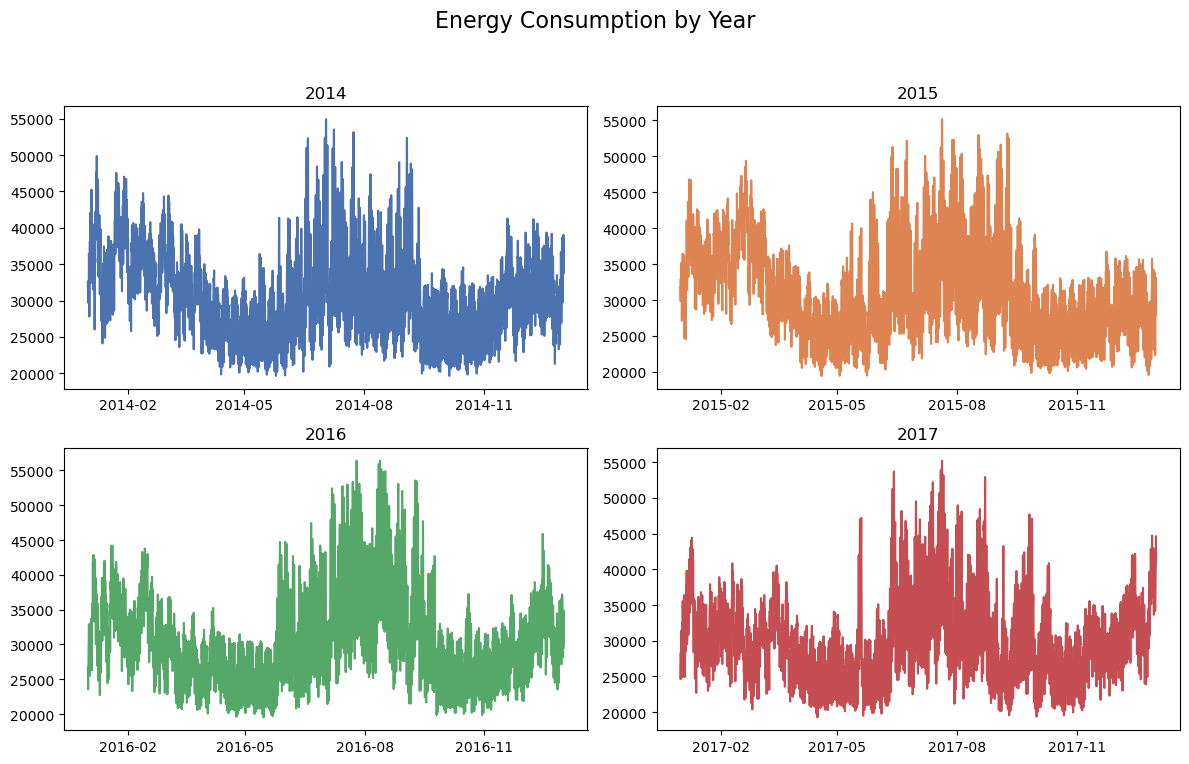

In [24]:
import seaborn as sns
import matplotlib.dates as mdates

years = [ds[ds.index.year == 2014], ds[ds.index.year == 2015], ds[ds.index.year == 2016], ds[ds.index.year == 2017]]
year_labels = ['2014', '2015', '2016', '2017']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Energy Consumption by Year', fontsize=16)

axes = axes.flatten()

colors = sns.color_palette('deep', 4)

for i, year in enumerate(years):
    axes[i].plot(year.index, year['PJME_MW'], color=colors[i])
    axes[i].set_title(year_labels[i])
    axes[i].xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Setting x axis tick marks/intervals
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
plt.show()

In [25]:
ds2017 = ds[ds.index.year == 2017]

<Axes: title={'center': 'Energy Consumption in 2017 year'}, xlabel='Datetime'>

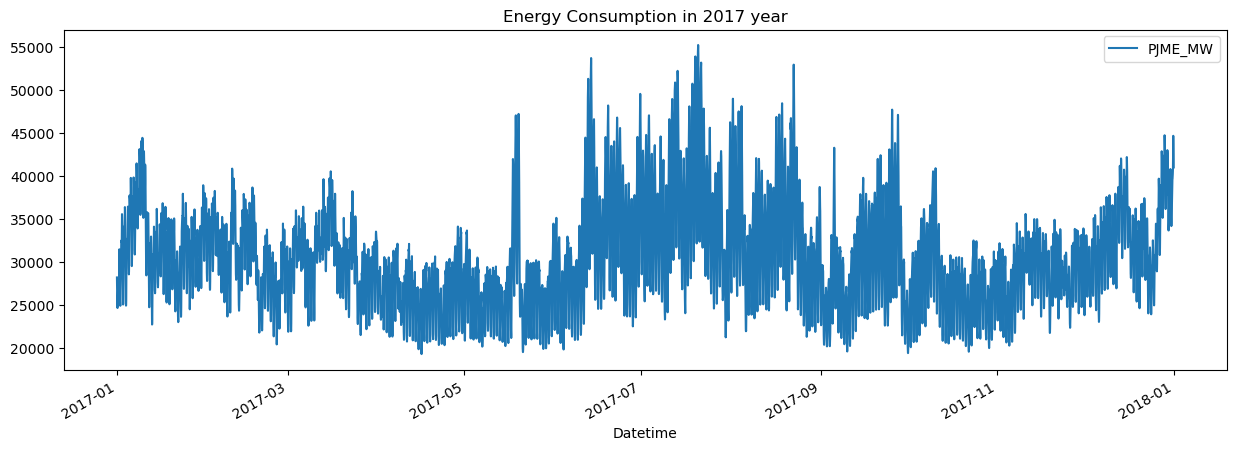

In [27]:
ds2017.plot(figsize=(15, 5), title='Energy Consumption in 2017 year')

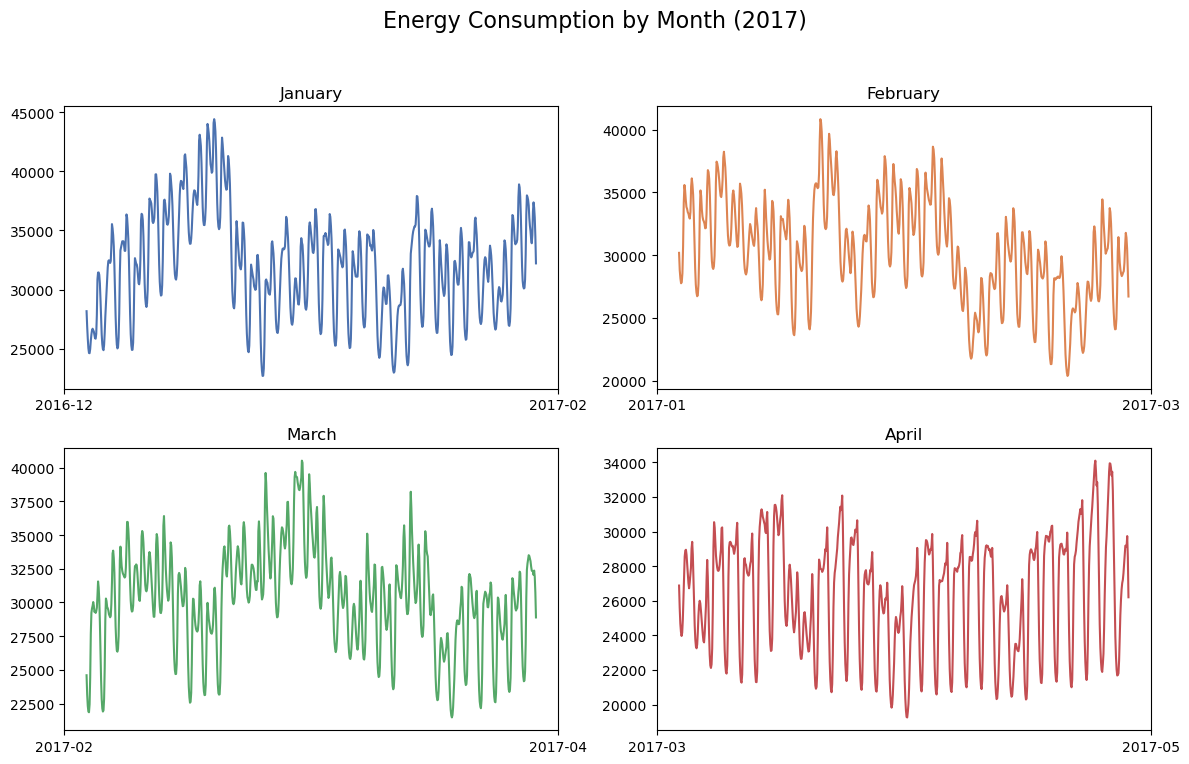

In [34]:
years = [ds2017[ds2017.index.month == 1], ds2017[ds2017.index.month == 2], ds2017[ds2017.index.month == 3], ds2017[ds2017.index.month == 4]]
year_labels = ['January', 'February', 'March', 'April']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Energy Consumption by Month (2017)', fontsize=16)

axes = axes.flatten()

colors = sns.color_palette('deep', 4)

for i, year in enumerate(years):
    axes[i].plot(year.index, year['PJME_MW'], color=colors[i])
    axes[i].set_title(year_labels[i])
    axes[i].xaxis.set_major_locator(mdates.MonthLocator(interval=5))  # Setting x axis tick marks/intervals
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
plt.show()

<Axes: title={'center': 'Energy Consumption in June, 2017'}, xlabel='Datetime'>

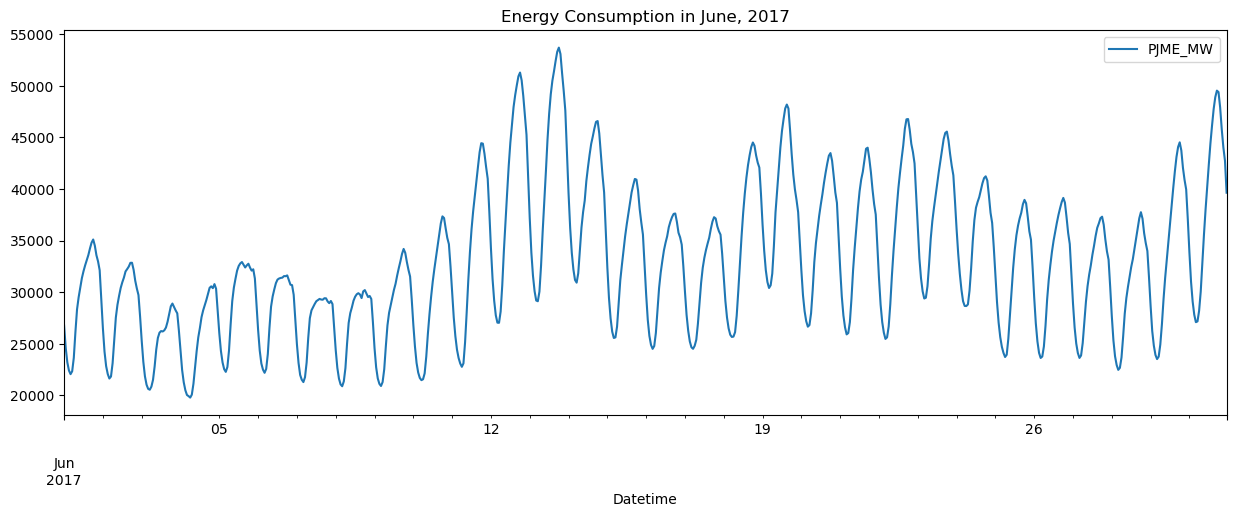

In [35]:
ds201706 = ds2017[ds2017.index.month == 6]
ds201706.plot(figsize=(15, 5), title='Energy Consumption in June, 2017')

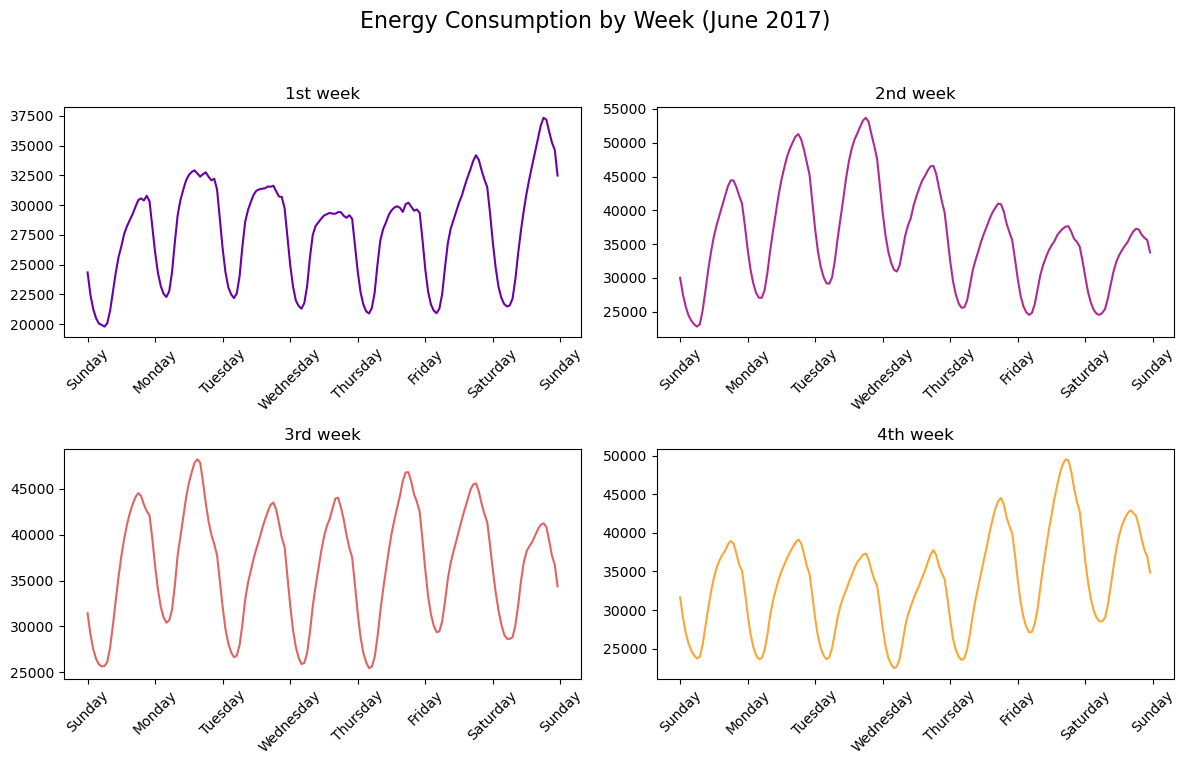

In [41]:
week_one = ds.loc[(ds.index >= '2017-06-04 00:00:00') & (ds.index < '2017-06-11 00:00:00')]
week_two = ds.loc[(ds.index >= '2017-06-11 00:00:00') & (ds.index < '2017-06-18 00:00:00')]
week_three = ds.loc[(ds.index >= '2017-06-18 00:00:00') & (ds.index < '2017-06-25 00:00:00')]
week_four = ds.loc[(ds.index >= '2017-06-25 00:00:00') & (ds.index < '2017-07-02 00:00:00')]

weeks = [week_one, week_two, week_three, week_four]
week_labels = ['1st week', '2nd week', '3rd week', '4th week']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Energy Consumption by Week (June 2017)', fontsize=16)

axes = axes.flatten()

colors = sns.color_palette('plasma', 4)

for i, week in enumerate(weeks):
    axes[i].plot(week.index, week['PJME_MW'], color = colors[i])
    axes[i].set_title(week_labels[i])
    
    axes[i].xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Setting x axis tick marks/intervals
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%A')) # Format x axis to say day names
        
    axes[i].tick_params(axis='x', rotation=45)  # rotate x-axis labels
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
plt.show()

<Axes: xlabel='Datetime'>

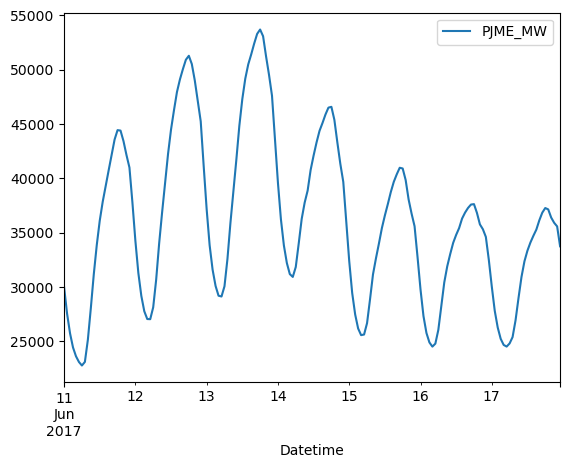

In [43]:
week_two.plot()

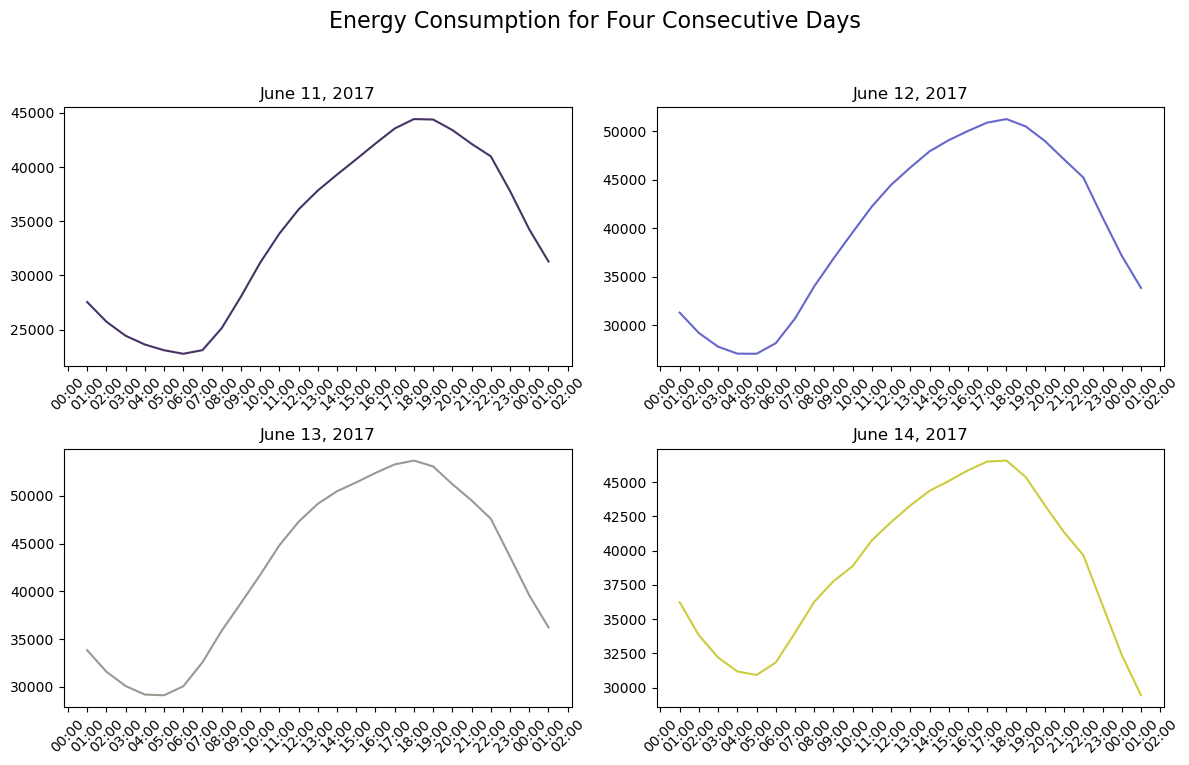

In [47]:
# Pulling out one day of data
day_one =   ds.loc[(ds.index >= '2017-06-11 01:00:00') & (ds.index <= '2017-06-12 01:00:00')]
day_two =   ds.loc[(ds.index >= '2017-06-12 01:00:00') & (ds.index <= '2017-06-13 01:00:00')]
day_three = ds.loc[(ds.index >= '2017-06-13 01:00:00') & (ds.index <= '2017-06-14 01:00:00')]
day_four =  ds.loc[(ds.index >= '2017-06-14 01:00:00') & (ds.index <= '2017-06-15 01:00:00')]
days = [day_one, day_two, day_three, day_four]
day_labels = ['June 11, 2017', 'June 12, 2017', 'June 13, 2017', 'June 14, 2017']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Energy Consumption for Four Consecutive Days', fontsize=16)

axes = axes.flatten()

colors = sns.color_palette('gist_stern', 4)

for i, day in enumerate(days):
    axes[i].plot(day.index, day['PJME_MW'], color=colors[i])
    axes[i].set_title(day_labels[i])
    
    axes[i].xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Setting x axis tick marks/intervals
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Show hours and minutes
    
    
    axes[i].tick_params(axis='x', rotation=45)  # Optionally rotate x-axis labels for better readability

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
plt.show()